# **DS 203 Course Project - 'Analysis of the Indian Premier league'**     

In [228]:
#importing the releveant libraries
import pandas as pd                       #importing pandas
import matplotlib.pyplot as plt           #importing matplotlib
import seaborn as sns                     #importing seaborn
import numpy as np                        #importing numpy

In [229]:
#reading the dataset into a pandas dataframe
df_deliveries=pd.read_csv("deliveries.csv")
df_matches=pd.read_csv("matches.csv")
match=df_matches.copy()
delivery=df_deliveries.copy()

# Data Pre-processing

In [230]:
#taking a look at the data-sets
display(df_deliveries.head())
display(df_matches.head())

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [231]:
print(df_matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [232]:
#finding the number of null values in each column of the matches dataset
print(df_matches.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [233]:
#finding the number of null values in each column of the deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [234]:
#Replacing the null values in the city column using the venue column
df_matches[(df_matches["city"].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [235]:
df_matches.loc[(df_matches.venue == 'Dubai International Cricket Stadium'),'city']='Dubai'
display(df_matches[(df_matches["venue"]=="Dubai International Cricket Stadium")])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [236]:
#Replacing multiple names for the same team
df_matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [237]:
df_matches["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [238]:
df_matches["toss_winner"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [239]:
df_matches["winner"].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [240]:
df_deliveries["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [241]:
df_deliveries["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [242]:
df_matches.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
df_deliveries.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
df_deliveries.replace("lbw","Leg before wicket",inplace=True)

In [243]:
df_matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [244]:
#replacing column date to datetime
df_matches['date'] = pd.to_datetime(df_matches['date'])

# Dropping insignificant columns with very large number of NaN (Not a number) values

In [245]:
display(df_matches.isnull().sum())
# the column umpire3 has a large number of NaN values and is thu, insignificant to our analysis
df_matches.drop(['umpire3'], axis = 1, inplace = True)
display(df_matches)

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [246]:
display(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Exploratory Data Analysis

,Stadium Name,Number of matches hosted
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


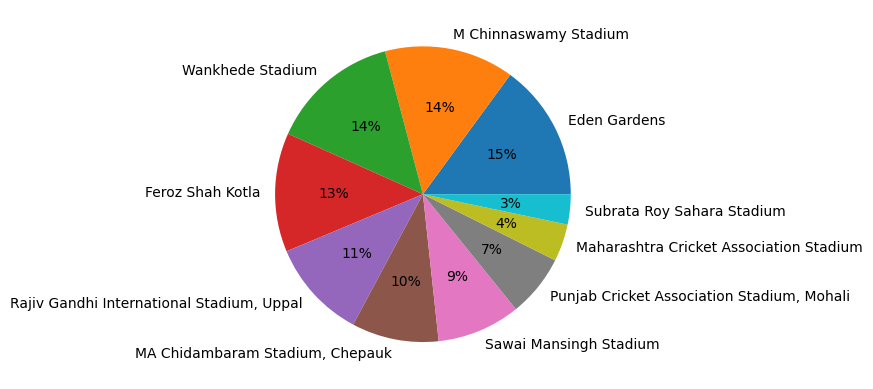

In [247]:
#creating a dataframe to store the number of matches hosted by each venue
venue=df_matches["venue"].value_counts()     #to find the number of occurences of each venue name in the column
venue_df=pd.DataFrame()                      #initializing the dataframe
stadium_name=venue.index
venue_df["Stadium Name"]=stadium_name
venue_df["Number of matches hosted"]=venue.values
display(venue_df)

#Plotting the data using a barplot
# fig, ax = plt.subplots(figsize=(15,15))
# sns.barplot(y=venue_df["Stadium Name"], x=venue_df["Number of matches hosted"],palette="viridis")
# plt.title("Number of Times Each Stadium Hosted",fontsize=20)         #specifying the title of the plot
# plt.xticks(fontsize=14)                                              #specifying the font size of the xticks and similarly the yticks
# plt.yticks(fontsize=14)
# plt.xlabel("Number of matches hosted",fontsize=16)
# plt.ylabel("Stadium Name",fontsize=16)
# plt.show()


plt.pie(venue_df.iloc[:, 1].head(10), labels = venue_df.iloc[:, 0].head(10), autopct='%.0f%%')
plt.show() 

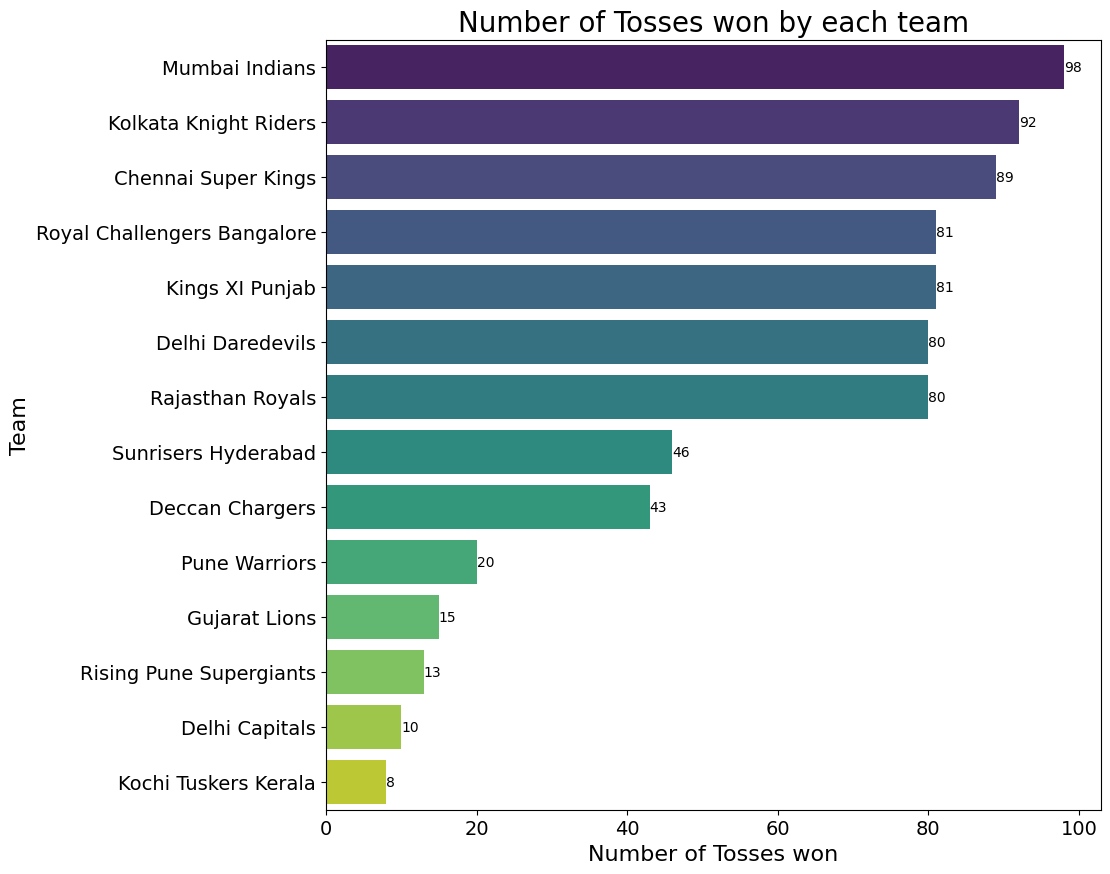

In [248]:
#Luckiest team (the metric being the number of tosses won)
toss=df_matches["toss_winner"].value_counts()
toss_df=pd.DataFrame()
team_name=toss.index
toss_df["Team"]=team_name
toss_df["Number of tosses won"]=toss.values

#Plotting a graph of the team vs the number of tosses won
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(y=toss_df["Team"], x=toss_df["Number of tosses won"],palette="viridis")
plt.title("Number of Tosses won by each team",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Number of Tosses won",fontsize=16)
plt.ylabel("Team",fontsize=16)
plt.show()

In [249]:
toss_df=toss_df.sort_values("Team").reset_index()
del toss_df["index"]

# Team to win the most matches after winning the toss

,Team,Matches won after winning the toss
0,Chennai Super Kings,57
1,Mumbai Indians,56
2,Kolkata Knight Riders,53
3,Rajasthan Royals,42
4,Royal Challengers Bangalore,41
5,Kings XI Punjab,35
6,Delhi Daredevils,35
7,Sunrisers Hyderabad,23
8,Deccan Chargers,19
9,Gujarat Lions,10


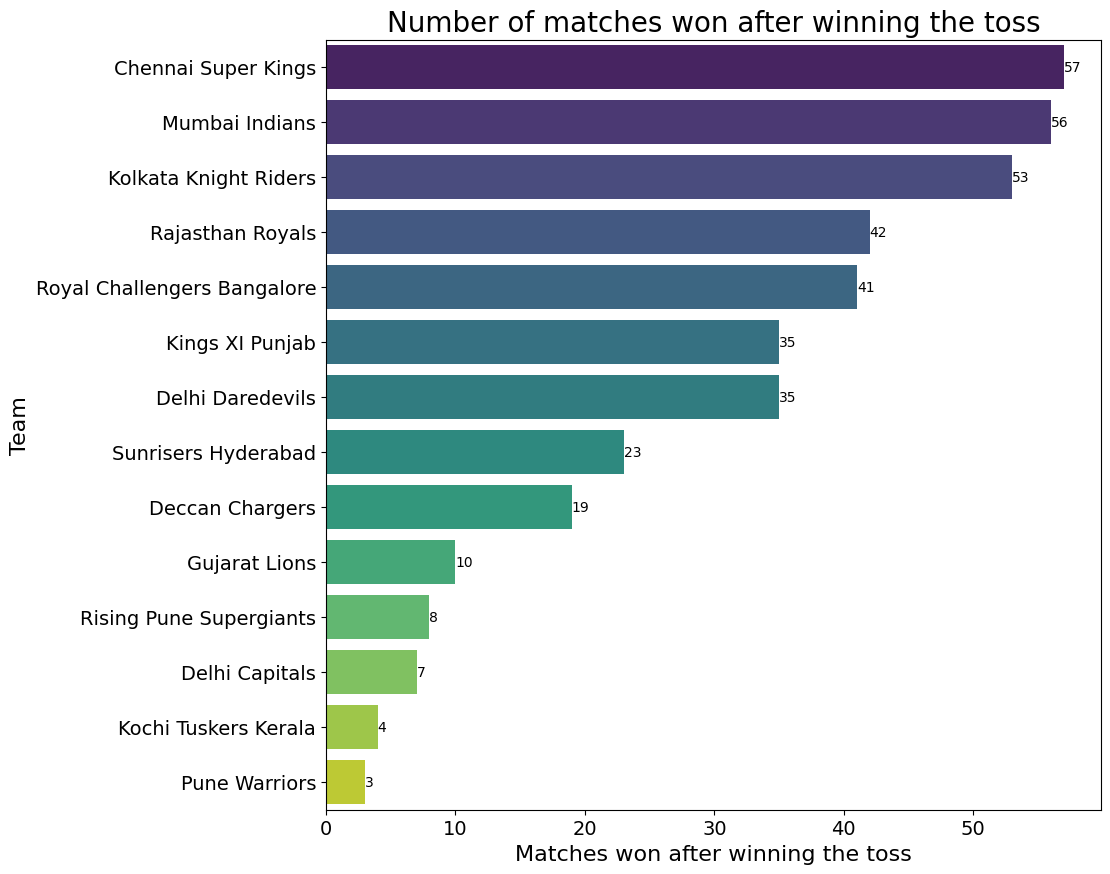

In [250]:
new_df=df_matches.apply(lambda row: row[df_matches["toss_winner"]==df_matches["winner"]])   #using lambda function to filter the rows in which the winning team and toss winner are same
toss_wins=new_df["toss_winner"].value_counts()
toss_wins_df=pd.DataFrame()
teams=toss_wins.index
toss_wins_df["Team"]=teams
toss_wins_df["Matches won after winning the toss"]=toss_wins.values
display(toss_wins_df)

#plotting a graph
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(y=toss_wins_df["Team"], x=toss_wins_df["Matches won after winning the toss"],palette="viridis")
plt.title("Number of matches won after winning the toss",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Matches won after winning the toss",fontsize=16)
plt.ylabel("Team",fontsize=16)
plt.show()

# Percentage of matches won after winning the toss

In [251]:
toss_wins_df=toss_wins_df.sort_values("Team").reset_index()
#toss_df contains the team and the number of matches won by the team
#toss_wins_df contains the team and the number of matches won by the team after winning the toss
del toss_wins_df["index"]
display(toss_df)
display(toss_wins_df)

,Team,Number of tosses won
0,Chennai Super Kings,89
1,Deccan Chargers,43
2,Delhi Capitals,10
3,Delhi Daredevils,80
4,Gujarat Lions,15
5,Kings XI Punjab,81
6,Kochi Tuskers Kerala,8
7,Kolkata Knight Riders,92
8,Mumbai Indians,98
9,Pune Warriors,20


,Team,Matches won after winning the toss
0,Chennai Super Kings,57
1,Deccan Chargers,19
2,Delhi Capitals,7
3,Delhi Daredevils,35
4,Gujarat Lions,10
5,Kings XI Punjab,35
6,Kochi Tuskers Kerala,4
7,Kolkata Knight Riders,53
8,Mumbai Indians,56
9,Pune Warriors,3


,Team,Matches won after winning the toss,Percentage
0,Chennai Super Kings,57,64.044944
1,Deccan Chargers,19,44.186047
2,Delhi Capitals,7,70.000000
3,Delhi Daredevils,35,43.750000
4,Gujarat Lions,10,66.666667
5,Kings XI Punjab,35,43.209877
6,Kochi Tuskers Kerala,4,50.000000
7,Kolkata Knight Riders,53,57.608696
8,Mumbai Indians,56,57.142857
9,Pune Warriors,3,15.000000


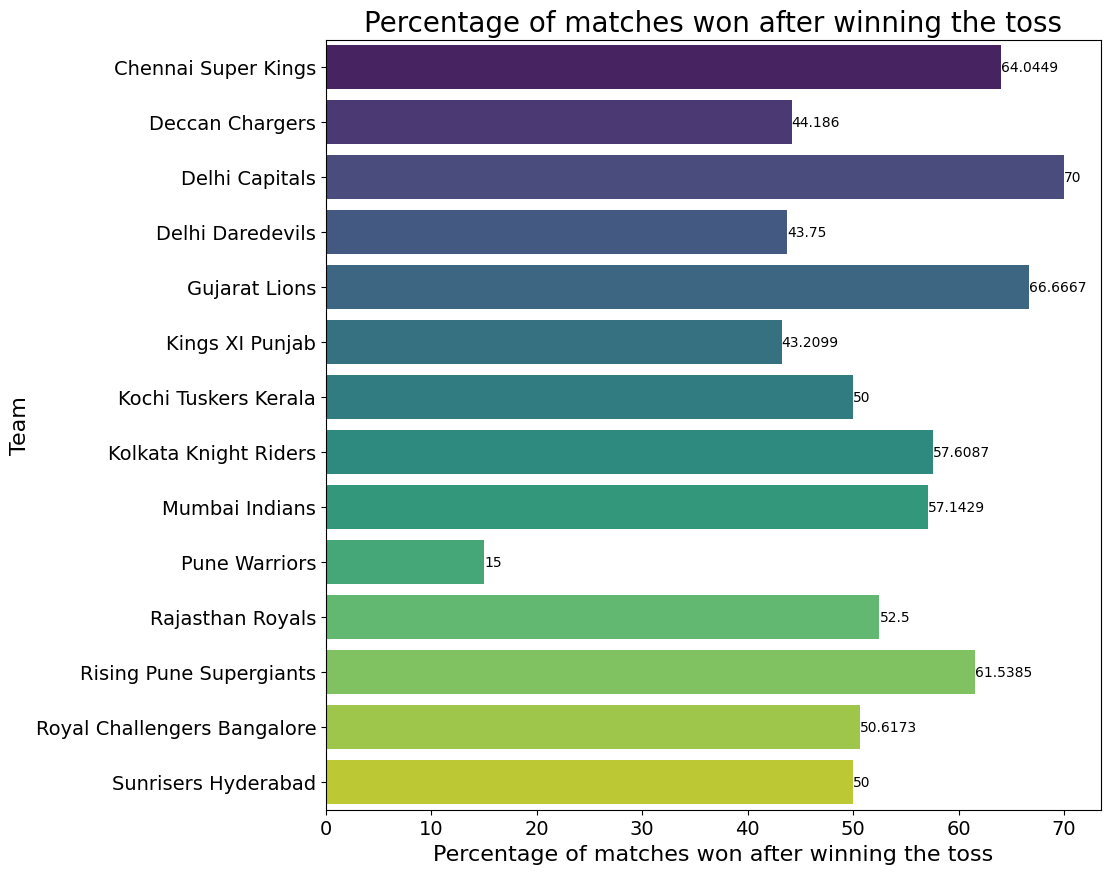

In [252]:
#calculating the number of matches won after winning the toss
percent=100*toss_wins_df["Matches won after winning the toss"]/(toss_df["Number of tosses won"])
toss_wins_df["Percentage"]=percent
display(toss_wins_df)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(y=toss_wins_df["Team"], x=toss_wins_df["Percentage"],palette="viridis")
plt.title("Percentage of matches won after winning the toss",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Percentage of matches won after winning the toss",fontsize=16)
plt.ylabel("Team",fontsize=16)
plt.show()

# Finding the player with the most number of catches throughout their career in IPL

,Player,Number of catches
0,MS Dhoni,159
1,KD Karthik,152
2,RV Uthappa,125
3,SK Raina,115
4,AB de Villiers,114
5,PA Patel,97
6,RG Sharma,92
7,V Kohli,90
8,KA Pollard,85
9,NV Ojha,82


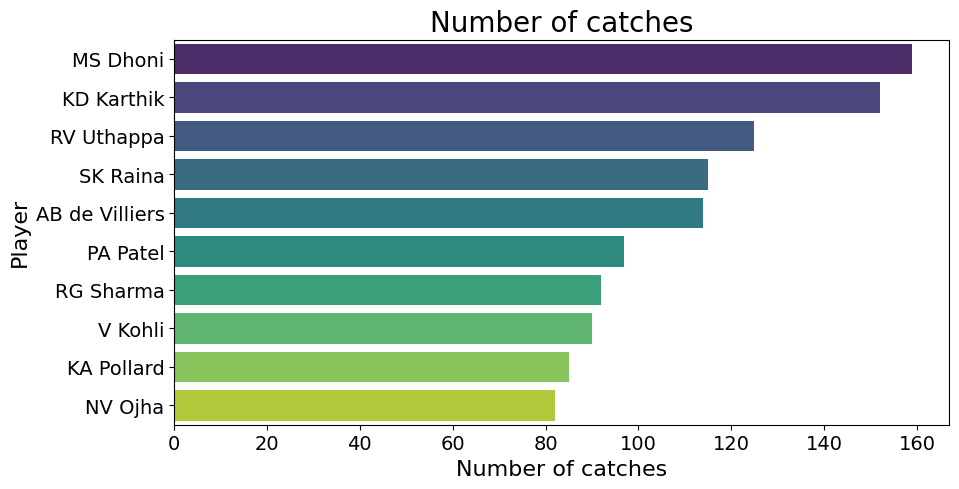

In [253]:
#most number of catches
caught=df_deliveries["fielder"].value_counts()    #caught_df contains the player and the number of catches caught by them
caught_df=pd.DataFrame()
player_name=caught.index
caught_df["Player"]=player_name
caught_df["Number of catches"]=caught.values
display(caught_df.head(10))

#plotting a graph
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=caught_df.iloc[0:10,0], x=caught_df["Number of catches"],palette="viridis")
plt.title("Number of catches",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of catches",fontsize=16)
plt.ylabel("Player",fontsize=16)
plt.show()

# Finding the most common dismissal type in matches

,Dismissal Type,Frequency of Dismissal type
0,caught,5348
1,bowled,1581
2,run out,852
3,Leg before wicket,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


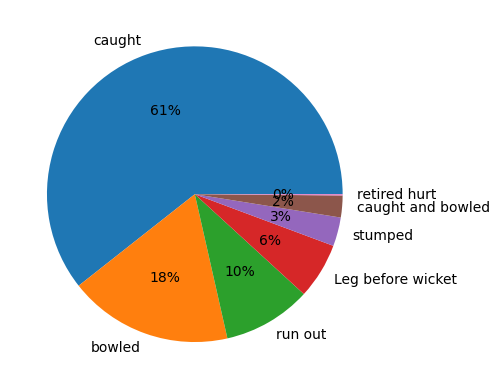

In [254]:
#most common dismissal kind
dismiss=df_deliveries["dismissal_kind"].value_counts()
dis_type_df=pd.DataFrame()
dis_type=dismiss.index
dis_type_df["Dismissal Type"]=dis_type
dis_type_df["Frequency of Dismissal type"]=dismiss.values
display(dis_type_df)
plt.pie(dis_type_df.iloc[:, 1].head(7), labels = dis_type_df.iloc[:, 0].head(7), autopct='%.0f%%')
plt.show() 

# Finding the player with the most 'Man Of The Match' wins

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
V Sehwag          11
DR Smith          11
AD Russell        11
A Mishra          11
JH Kallis         10
KA Pollard        10
SE Marsh           9
AT Rayudu          9
Name: player_of_match, dtype: int64

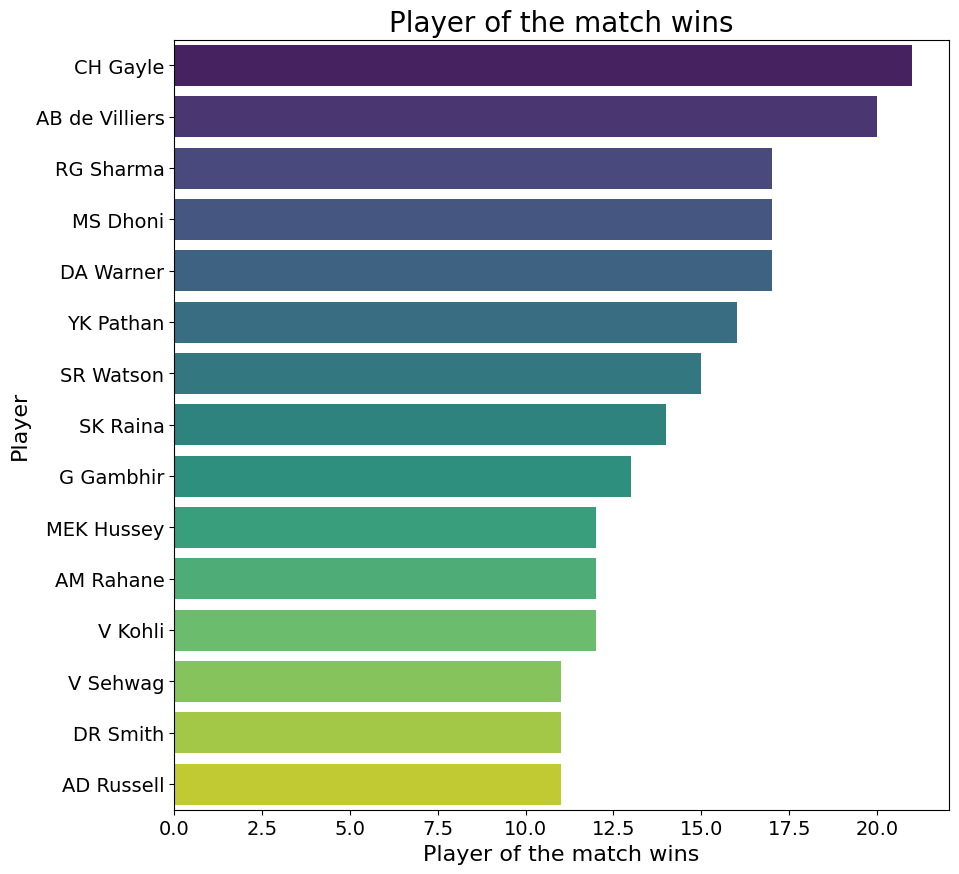

In [255]:
#most player of the match wins
potm=df_matches["player_of_match"].value_counts()   #potm contains the player's name and the number of times he has been awarded with the man of the match title
display(potm.head(20))

#creating a plot
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y=potm.index[0:15], x=potm.values[0:15],palette="viridis")
plt.title("Player of the match wins",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Player of the match wins",fontsize=16)
plt.ylabel("Player",fontsize=16)
plt.show()

# Finding the greatest victories by runs and wickets

Basically we are trying to find the victories in which the winning team won by a huge run margin

,Winner,win by runs
2,Mumbai Indians,146
1,Royal Challengers Bangalore,144
5,Kolkata Knight Riders,140
0,Sunrisers Hyderabad,118
6,Kings XI Punjab,111
9,Rajasthan Royals,105
7,Delhi Daredevils,97
8,Chennai Super Kings,97
10,Deccan Chargers,82
3,Rising Pune Supergiants,61


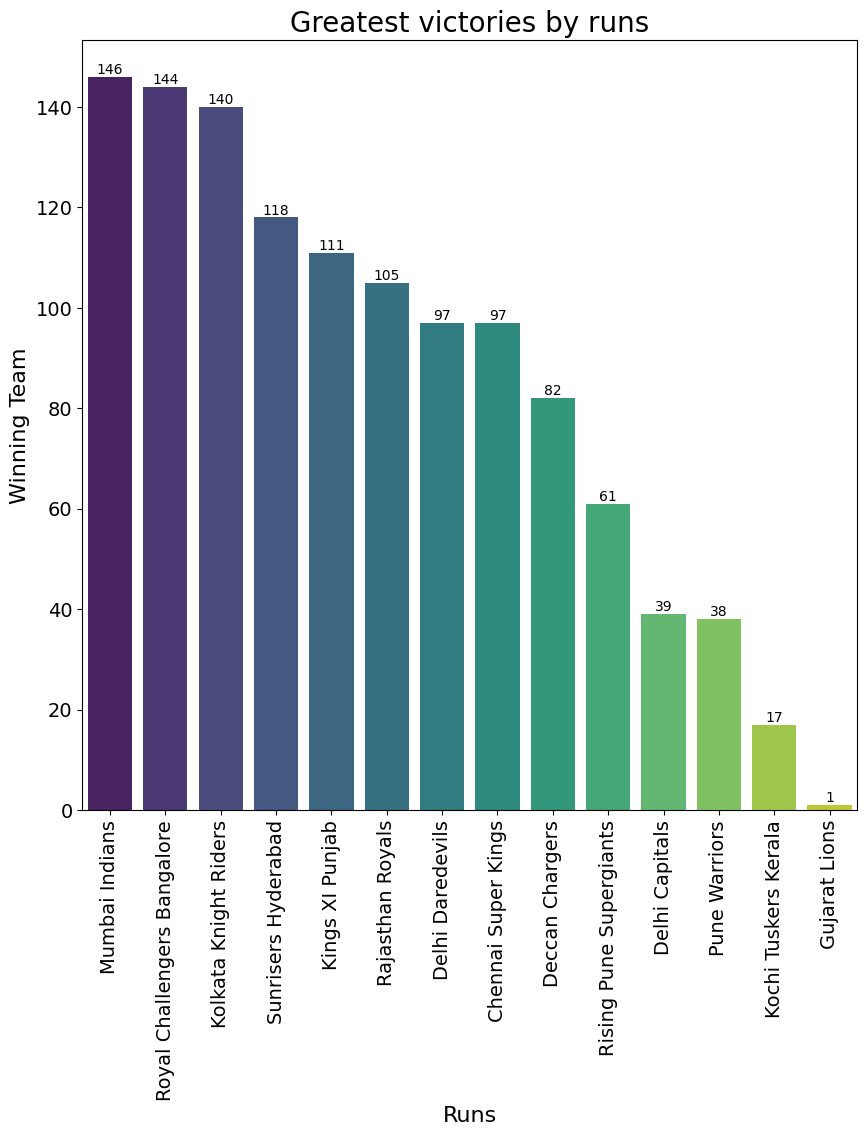

In [256]:
#Greatest victory by runs
alt_df=df_matches.copy()
alt_df.sort_values("win_by_runs",ascending=False,inplace=True)   #sorting the wins by run margin in descending order
run_win_df=pd.DataFrame()
run_win_df["Winner"]=alt_df["winner"]
run_win_df["win by runs"]=alt_df["win_by_runs"]
run_win_df.reset_index(inplace=True)
#this code snippet basically finds the maximum value of the run margin for multiple occurences of the same team name
#for example, if CSK won a match by 142 runs and another by 132 runs, then we only want the match with the 142 run margin
list=[]
for i in df_deliveries['batting_team'].unique():
    for j in range(len(run_win_df)):
        if i == run_win_df.iloc[:, 1][j]:
            list.append([run_win_df.iloc[:, 1][j], run_win_df.iloc[:, 2][j]])
            break
team_name=[]
runs=[]
for term in list:
    team_name.append(term[0])
    runs.append(term[1])
#creating a dataframe
df1=pd.DataFrame()
df1["Winner"]=pd.Series(team_name).values
df1["win by runs"]=pd.Series(runs).values
df1.sort_values("win by runs",inplace=True,ascending=False)
display(df1)

#creating a plot
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=df1["Winner"], y=df1["win by runs"],palette="viridis")
plt.title("Greatest victories by runs",fontsize=20)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Runs",fontsize=16)
plt.ylabel("Winning Team",fontsize=16)
plt.show()

,Winner,win by wickets
0,Royal Challengers Bangalore,10
1,Sunrisers Hyderabad,10
3,Mumbai Indians,10
4,Kolkata Knight Riders,10
6,Kings XI Punjab,10
7,Delhi Daredevils,10
8,Chennai Super Kings,10
9,Rajasthan Royals,10
10,Deccan Chargers,10
2,Rising Pune Supergiants,9


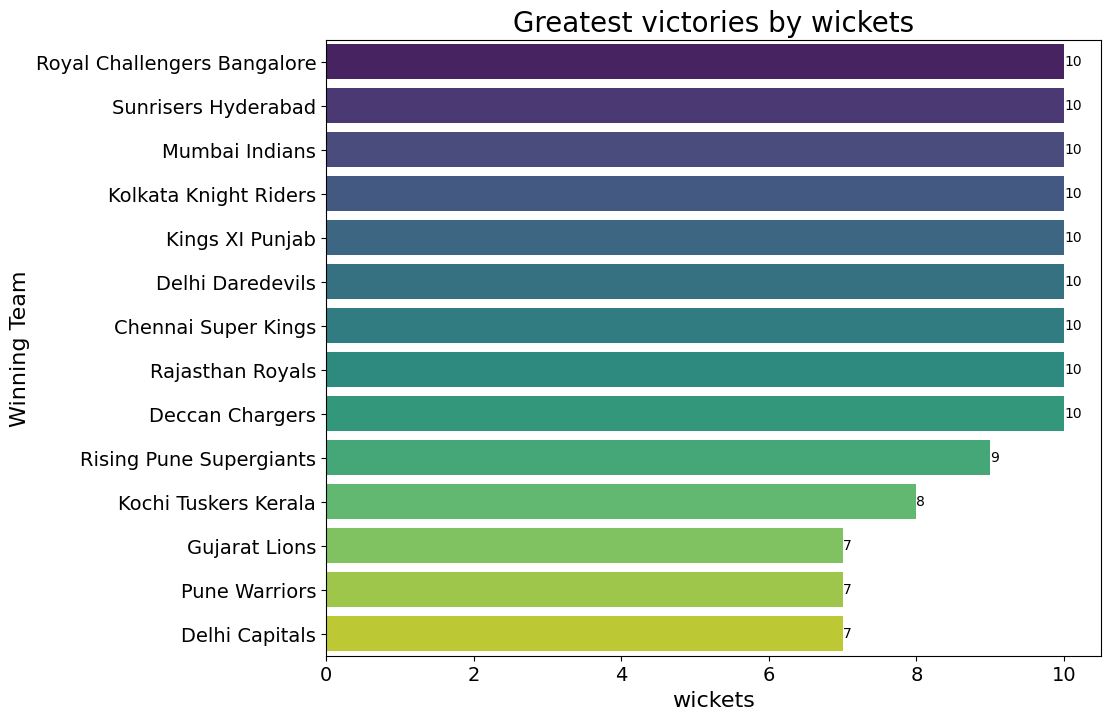

In [257]:
#Greatest victory by wickets
alt_df=df_matches.copy()
alt_df.sort_values("win_by_wickets",ascending=False,inplace=True)
wicket_win_df=pd.DataFrame()
wicket_win_df["Winner"]=alt_df["winner"]
wicket_win_df["win by wickets"]=alt_df["win_by_wickets"]
wicket_win_df.reset_index(inplace=True)
#this code snippet basically finds the maximum value of the wicket margin for multiple occurences of the same team name
#for example, if CSK won a match by 10 wickets and another by 9 wickets, then we only want the match with the 10 wickets margin
list = []
for i in df_deliveries['bowling_team'].unique():
    for j in range(len(wicket_win_df)):
        if i == wicket_win_df.iloc[:, 1][j]:
            list.append([wicket_win_df.iloc[:, 1][j], wicket_win_df.iloc[:, 2][j]])
            break
team_name=[]
runs=[]
for term in list:
    team_name.append(term[0])
    runs.append(term[1])
#creating a dataframe
df1=pd.DataFrame()
df1["Winner"]=pd.Series(team_name).values
df1["win by wickets"]=pd.Series(runs).values
df1.sort_values("win by wickets",inplace=True,ascending=False)
display(df1)

#creating a plot of the same
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=df1["Winner"], x=df1["win by wickets"],palette="viridis")
plt.title("Greatest victories by wickets",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("wickets",fontsize=16)
plt.ylabel("Winning Team",fontsize=16)
plt.show()

# Most wickets by a player

In [258]:
#most wickets by a bowler
n_df=df_deliveries.apply(lambda row: row[df_deliveries["player_dismissed"].notnull()])      #applying a lambda function to find the rows in which the player dismissed is not a null value
dismissal=["caught","bowled","Leg before wicekt","stumped","caught and bowled","hit wicket"] #wickets taken by a bowler does not include run out, retired hurt and obsttructing the field 
n_df=n_df.apply(lambda row: row[n_df["dismissal_kind"].isin(dismissal)])
max_wickets = pd.DataFrame()
max_wickets['Bowler Name'] = n_df["bowler"].value_counts().index
max_wickets['No. of wickets'] = n_df["bowler"].value_counts().values
display(max_wickets.head(10))


,Bowler Name,No. of wickets
0,SL Malinga,159
1,A Mishra,143
2,Harbhajan Singh,142
3,DJ Bravo,141
4,PP Chawla,133
5,B Kumar,125
6,R Ashwin,111
7,UT Yadav,110
8,SP Narine,106
9,A Nehra,101


# Most 4's and 6's by a batsman

In [259]:
#most four's and 6's by a batsman
my_list=[4,6]
fours_list=[]
six_list=[]
batsmen=df_deliveries["batsman"].unique()
four_six=df_deliveries.apply(lambda row: row[df_deliveries["batsman_runs"].isin(my_list)])    #applying a lambda function to find the rows which contain a 4 or a 6
#this code snippet is to find the number of 4's and 6's by a particular batsman
#such a snippet is needed because it is possible that a player does not hit a 4 then the list does not contain 4 as an index and a subsequent part of the code throws an error
for player in batsmen:
    temp_df=four_six.apply(lambda row: row[four_six["batsman"]==player])
    value_ct=temp_df["batsman_runs"].value_counts().sort_index()
    if(len(value_ct.index.values)==0):
        fours_list.append(0)
        six_list.append(0)
    elif(len(value_ct.index.values)==2):
        fours_list.append(value_ct.values[0])
        six_list.append(value_ct.values[1])
    elif(value_ct.index.values[0]==6):
        six_list.append(value_ct.values[0])
        fours_list.append(0)
    elif(len(value_ct.index.values)==1):
        fours_list.append(value_ct.values[0])
        six_list.append(0)
run_df=pd.DataFrame()
run_df.index=batsmen
a=pd.Series(fours_list)
b=pd.Series(six_list)
run_df["Number of Fours"]=a.values
run_df["Number of Sixes"]=b.values
#sorting the batsmen by most number of 6's
display(run_df.sort_values("Number of Sixes",ascending=False).iloc[:, :1].head(20))
#sorting the batsmen by most number of 4's
display(run_df.sort_values("Number of Fours",ascending=False).iloc[:, :2:2].head(20))

,Number of Fours
CH Gayle,376
AB de Villiers,357
MS Dhoni,297
SK Raina,495
RG Sharma,431
V Kohli,482
DA Warner,459
SR Watson,344
KA Pollard,182
YK Pathan,264


,Number of Fours
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,376
PA Patel,366


# Most teams played for by a batsman

AJ Finch        7
Yuvraj Singh    6
KD Karthik      6
PA Patel        6
NLTC Perera     5
Ankit Sharma    5
A Nehra         5
BB McCullum     5
P Kumar         5
IK Pathan       5
dtype: int64

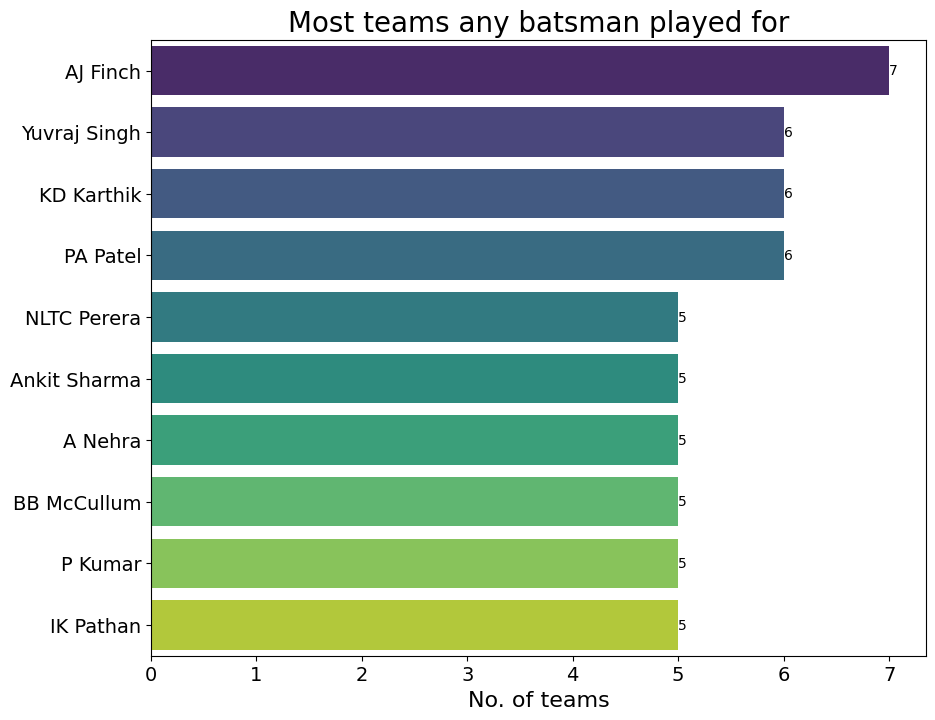

In [301]:
#most teams played for(batsmen)
batsmen=df_deliveries["batsman"].unique()
my_list=[]
for plyr in batsmen:
    temp_df=df_deliveries.apply(lambda row: row[df_deliveries["batsman"]==plyr])
    most_teams_played=len(temp_df["batting_team"].unique())
    my_list.append(most_teams_played)
sr=pd.Series(my_list)
sr.index=batsmen
sr=sr.sort_values(ascending=False)
display(sr.head(10))
#creating a plot of the same
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(y=sr.index[:10], x=sr.values[:10], palette="viridis")
plt.title("Most teams any batsman played for",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("No. of teams",fontsize=16)

plt.show()

# Most teams played for by a bowler

In [261]:
#most teams played for(bowler)
bowler=df_deliveries["bowler"].unique()
my_list=[]
for plyr in bowler:
    temp_df=df_deliveries.apply(lambda row: row[df_deliveries["bowler"]==plyr])
    most_teams_played=len(temp_df["bowling_team"].unique())
    my_list.append(most_teams_played)
sr=pd.Series(my_list)
sr.index=bowler
sr=sr.sort_values(ascending=False)
display(sr.head(10))

Number of matches won by a team after winning the toss choosing fielding

In [262]:
match_df=match.copy()
match_df.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
filter1 = match_df['toss_decision'] == 'field'
filter2 = match_df['toss_decision'] == 'bat'
match_df_field = match_df[filter1]
match_df_field.reset_index(inplace = True)
#len(match_df[filter1])
#j=0
fieldwinlist = []
#fieldwinlist = []
#fieldwinlist = np.empty()
#j=0
for i in range(len(match_df_field) - 1):
    if(match_df_field['toss_winner'][i] == match_df_field['winner'][i]):
        #fieldwinlist[j] = match_df_field['toss_winner'][i]
        #j = j+1
        fieldwinlist.append(match_df_field['toss_winner'][i])
df_fieldwinlist = pd.DataFrame(fieldwinlist)
df_fieldwinlist[0].value_counts()
#match_df[filter1]['toss_winner'] == match_df[filter1]['winner']

Kolkata Knight Riders          38
Royal Challengers Bangalore    32
Mumbai Indians                 31
Kings XI Punjab                29
Rajasthan Royals               27
Chennai Super Kings            26
Delhi Daredevils               24
Sunrisers Hyderabad            15
Gujarat Lions                  10
Rising Pune Supergiants         8
Deccan Chargers                 8
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: 0, dtype: int64

# Percentage win of teams while batting first

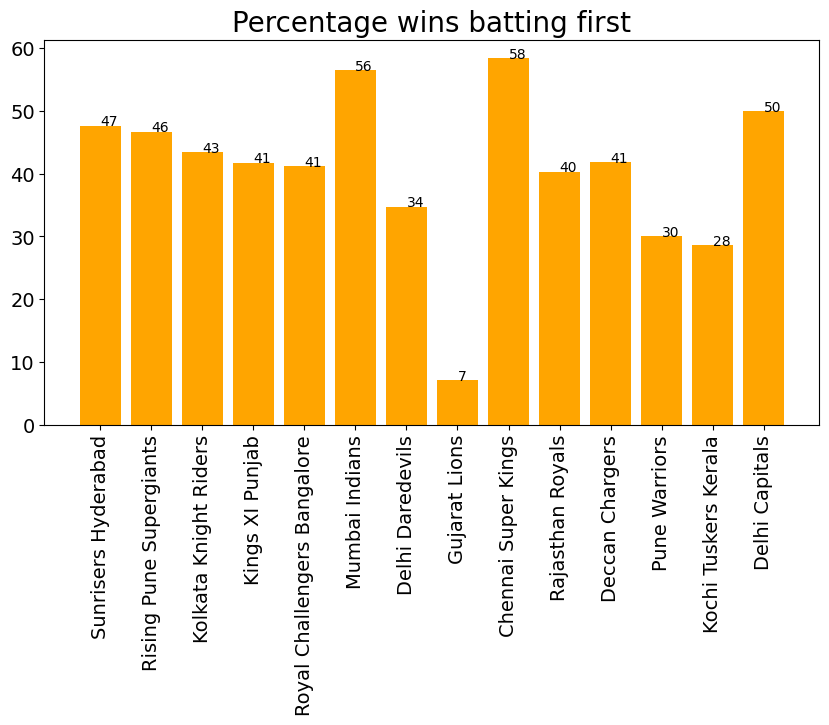

In [283]:
ballbyball_df = delivery.copy()
ballbyball_df.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
winuniq = match_df['winner'].unique()
win_uniq = [x for x in winuniq if str(x) != 'nan']
#winuniq.dropna()
#print(win_uniq)
matchwonbatfirst = []
matchplayedbatfirst = []
for items in win_uniq:
    filter1 = match_df['winner'] == items
    filter = match_df[filter1]['win_by_runs']!=0
    match_df_winbattingfirst = match_df[filter1][filter]
    match_df_winbattingfirst.reset_index(inplace = True)
    #df_matchwonbatfirst = pd.DataFrame()
    matchwonbatfirst.append(len(match_df_winbattingfirst))
    #print(len(match_df_winbattingfirst))
    filterfirstinn = ballbyball_df['inning'] == 1
    firstinn_df = ballbyball_df[filterfirstinn]
    firstinn_df.reset_index(inplace = True)
    filterbatting = firstinn_df['batting_team'] == items
    firstbat_df = firstinn_df[filterbatting]
    firstbat_df.reset_index(inplace = True)
    matchplayedbatfirst.append(firstbat_df['match_id'].nunique())
    #print(firstbat_df['id'].nunique())
fractionwinbatfirst = []
fractionwinbatfirst = [i / j for i, j in zip(matchwonbatfirst, matchplayedbatfirst)]
percentwinbatfirst = [item * 100 for item in fractionwinbatfirst]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],int(y[i]))
#for i in range(14):
#    percentwinbatfirst[i] = (matchwonbatfirst[i]/matchplayedbatfirst[i])*100
#print(percentwinbatfirst)
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(win_uniq,percentwinbatfirst,color="orange")
addlabels(win_uniq, percentwinbatfirst)
#for i in range(len(win_uniq)):
#    plt.text(i,percentwinbatfirst[i],percentwinbatfirst[i])
plt.title('Percentage wins batting first',fontsize=20)
ab = plt.gca()
for tick in ab.get_xticklabels(): 
    tick.set_rotation(90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Percentage win of different teams while batting second

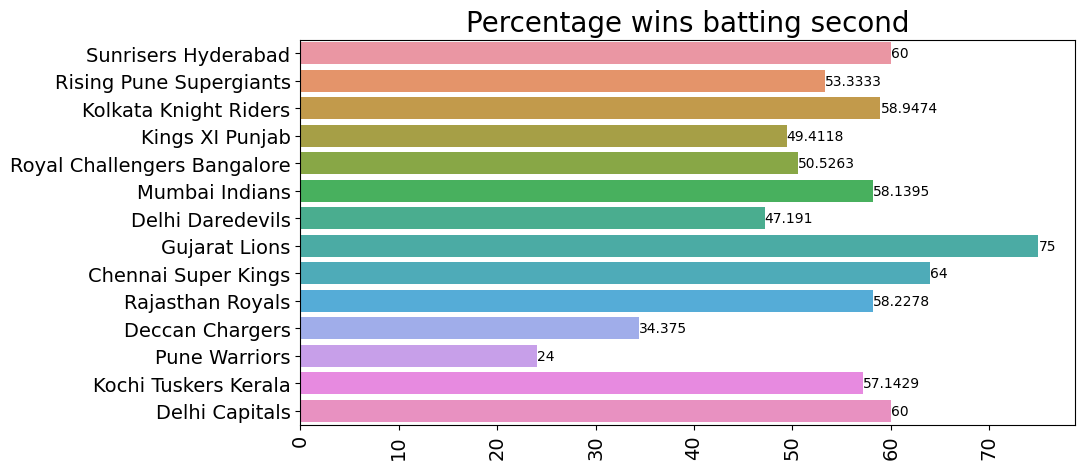

In [288]:
matchwonbatsecond = []
matchplayedbatsecond = []
for item in win_uniq:
    filter2 = match_df['winner'] == item
    filter3 = match_df[filter2]['win_by_wickets']!=0
    match_df_winbatsecond = match_df[filter2][filter3]
    match_df_winbatsecond.reset_index(inplace = True)
    matchwonbatsecond.append(len(match_df_winbatsecond))
    filtersecondinn = ballbyball_df['inning'] == 2
    secondinn_df = ballbyball_df[filtersecondinn]
    secondinn_df.reset_index(inplace = True)
    filterteambatsec = secondinn_df['batting_team'] == item
    secondinnteam_df = secondinn_df[filterteambatsec]
    secondinnteam_df.reset_index(inplace = True)
    matchplayedbatsecond.append(secondinnteam_df['match_id'].nunique())
fractionwinbatsecond = []
fractionwinbatsecond = [k / l for k, l in zip(matchwonbatsecond, matchplayedbatsecond)]
percentwinbatsecond = [item * 100 for item in fractionwinbatsecond]
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(y=win_uniq,x=percentwinbatsecond)
plt.title('Percentage wins batting second',fontsize=20)
ab = plt.gca()
for tick in ab.get_xticklabels(): 
    tick.set_rotation(90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# Best batting in powerplay by calculating average runs scored per ball by different teams in powerplay

                      Team name  Run Rate
0           Sunrisers Hyderabad  7.645104
1       Rising Pune Supergiants  7.224490
2         Kolkata Knight Riders  7.476148
3               Kings XI Punjab  7.367254
4   Royal Challengers Bangalore  7.204286
5                Mumbai Indians  6.987483
6              Delhi Daredevils  7.375174
7                 Gujarat Lions  8.074468
8           Chennai Super Kings  7.114940
9              Rajasthan Royals  7.152274
10              Deccan Chargers  7.194385
11                Pune Warriors  6.710921
12         Kochi Tuskers Kerala  7.289593
13               Delhi Capitals  8.472000


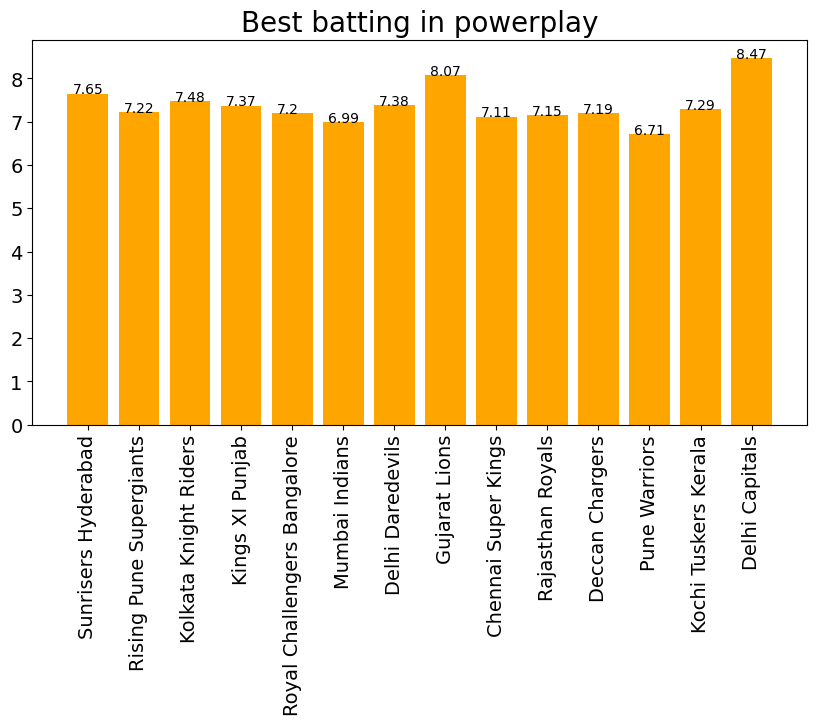

In [303]:
filterpowerplay = ballbyball_df['over']<=5
powerplay_df = ballbyball_df[filterpowerplay]
powerplay_df.reset_index(inplace = True)
runperball = []
for items in win_uniq:
    filterteam = powerplay_df['batting_team'] == items
    powerplayteam_df = powerplay_df[filterteam]
    powerplayteam_df.reset_index(inplace = True)
    noofballs = len(powerplayteam_df['over'])
    noofruns = powerplayteam_df['total_runs'].sum()
    runpball = 6*noofruns/noofballs
    runperball.append(runpball)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.3,y[i],round(y[i], 2))
#print(win_uniq)
#print(runperball)
df1 = pd.DataFrame(data=zip(win_uniq, runperball),columns=['Team name','Run Rate'])
print(df1)
fig,ax=plt.subplots(figsize=(10,5))
plt.bar(win_uniq, runperball,color="orange")
addlabels(win_uniq, runperball)
plt.title('Best batting in powerplay',fontsize=20)
ab = plt.gca()
for tick in ab.get_xticklabels(): 
    tick.set_rotation(90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()    
    

# Similarly calculating best batting among teams in death overs

                      Team name   Run Rate
0           Sunrisers Hyderabad   9.207243
1       Rising Pune Supergiants   9.510471
2         Kolkata Knight Riders   9.451187
3               Kings XI Punjab   9.198404
4   Royal Challengers Bangalore  10.147210
5                Mumbai Indians   9.764349
6              Delhi Daredevils   9.327582
7                 Gujarat Lions   8.836086
8           Chennai Super Kings   9.900195
9              Rajasthan Royals   8.978102
10              Deccan Chargers   8.938659
11                Pune Warriors   8.110764
12         Kochi Tuskers Kerala   7.672131
13               Delhi Capitals   9.684706


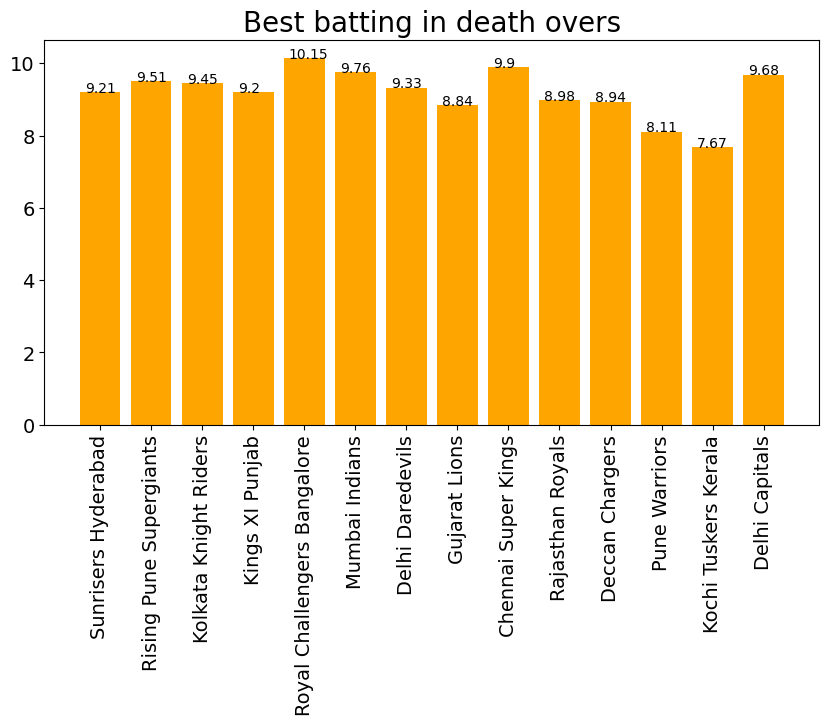

In [305]:
filterdeath = ballbyball_df['over']>=16
death_df = ballbyball_df[filterdeath]
death_df.reset_index(inplace = True)
runperballdeath = []
for items in win_uniq:
    filterteamdeath = death_df['batting_team'] == items
    deathteam_df = death_df[filterteamdeath]
    deathteam_df.reset_index(inplace = True)
    noofballsdeath = len(deathteam_df['over'])
    noofrunsdeath = deathteam_df['total_runs'].sum()
    runpballdeath = 6*noofrunsdeath/noofballsdeath
    runperballdeath.append(runpballdeath)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.3,y[i],round(y[i], 2))
#print(win_uniq)
#print(runperball)
df2 = pd.DataFrame(data=zip(win_uniq, runperballdeath),columns=['Team name','Run Rate'])
print(df2)
fig,ax=plt.subplots(figsize=(10,5))
plt.bar(win_uniq, runperballdeath,color="orange")
addlabels(win_uniq, runperballdeath)
plt.title('Best batting in death overs',fontsize=20)
ab = plt.gca()
for tick in ab.get_xticklabels(): 
    tick.set_rotation(90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Best bowling in powerplay by calculating average runs conceded by teams in powerplay

                      Team name  powerplay wickets per match
0           Sunrisers Hyderabad                     1.027778
1       Rising Pune Supergiants                     1.133333
2         Kolkata Knight Riders                     1.258427
3               Kings XI Punjab                     1.238636
4   Royal Challengers Bangalore                     1.250000
5                Mumbai Indians                     1.139037
6              Delhi Daredevils                     1.416149
7                 Gujarat Lions                     1.166667
8           Chennai Super Kings                     1.054878
9              Rajasthan Royals                     1.034247
10              Deccan Chargers                     1.146667
11                Pune Warriors                     1.400000
12         Kochi Tuskers Kerala                     1.428571
13               Delhi Capitals                     1.000000


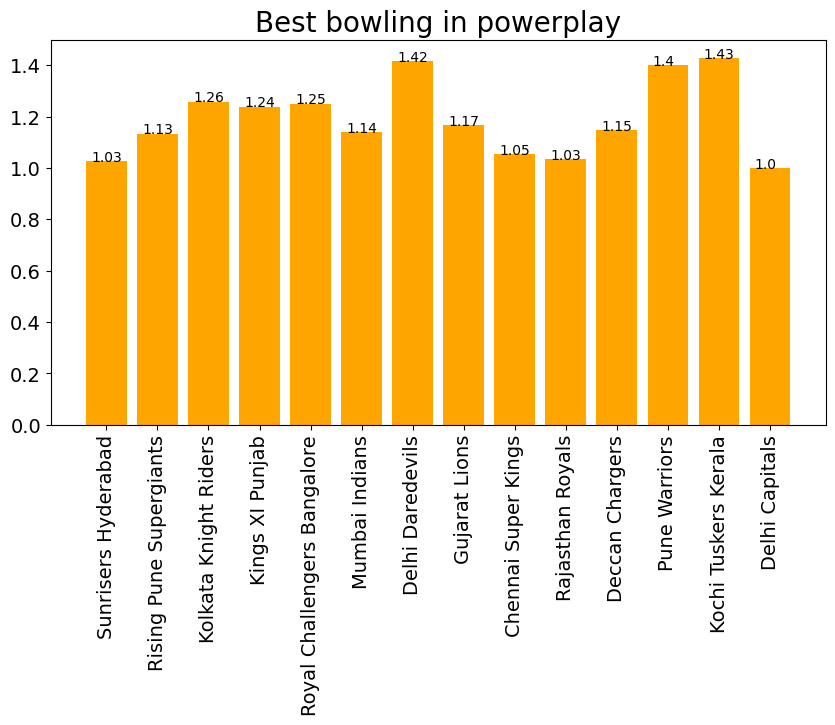

In [306]:
filterpowerplay = ballbyball_df['over']<=5
powerplay_df = ballbyball_df[filterpowerplay]
powerplay_df.reset_index(inplace = True)
wicketspermatch = []
for items in win_uniq:
    filterteam = powerplay_df['batting_team'] == items
    powerplayteam_df = powerplay_df[filterteam]
    powerplayteam_df.reset_index(inplace = True)
    noofmatches = powerplayteam_df['match_id'].nunique()
    wicket_df = powerplayteam_df['dismissal_kind']
    a = wicket_df.isna().sum() 
    noofwickets = len(wicket_df) - a
    wicketspmatch = noofwickets/noofmatches
    wicketspermatch.append(wicketspmatch)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.3,y[i],round(y[i], 2))
#print(win_uniq)
#print(runperball)
df3 = pd.DataFrame(data=zip(win_uniq, wicketspermatch),columns=['Team name','powerplay wickets per match'])
print(df3)
fig,ax=plt.subplots(figsize=(10,5))
plt.bar(win_uniq, wicketspermatch,color="orange")
addlabels(win_uniq, wicketspermatch)
plt.title('Best bowling in powerplay',fontsize=20)
ab = plt.gca()
for tick in ab.get_xticklabels(): 
    tick.set_rotation(90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Similarly calculating best bowling in Death

/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/765053840.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deathteam_df = death_df[filterteam]
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/765053840.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deathteam_df = death_df[filterteam]
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/765053840.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deathteam_df = death_df[filterteam]
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/765053840.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deathteam_df = death_df[filterteam]
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/765053840.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deathteam_df = death_df[filterteam]
/var/folders/37/q5mv6wgn111btd

                      Team name  powerplay wickets per match
0           Sunrisers Hyderabad                     1.556522
1       Rising Pune Supergiants                     1.444444
2         Kolkata Knight Riders                     1.637131
3               Kings XI Punjab                     1.761261
4   Royal Challengers Bangalore                     1.716738
5                Mumbai Indians                     1.556000
6              Delhi Daredevils                     1.506329
7                 Gujarat Lions                     1.940000
8           Chennai Super Kings                     1.708738
9              Rajasthan Royals                     1.621762
10              Deccan Chargers                     1.765217
11                Pune Warriors                     1.811594
12         Kochi Tuskers Kerala                     2.052632
13               Delhi Capitals                          NaN


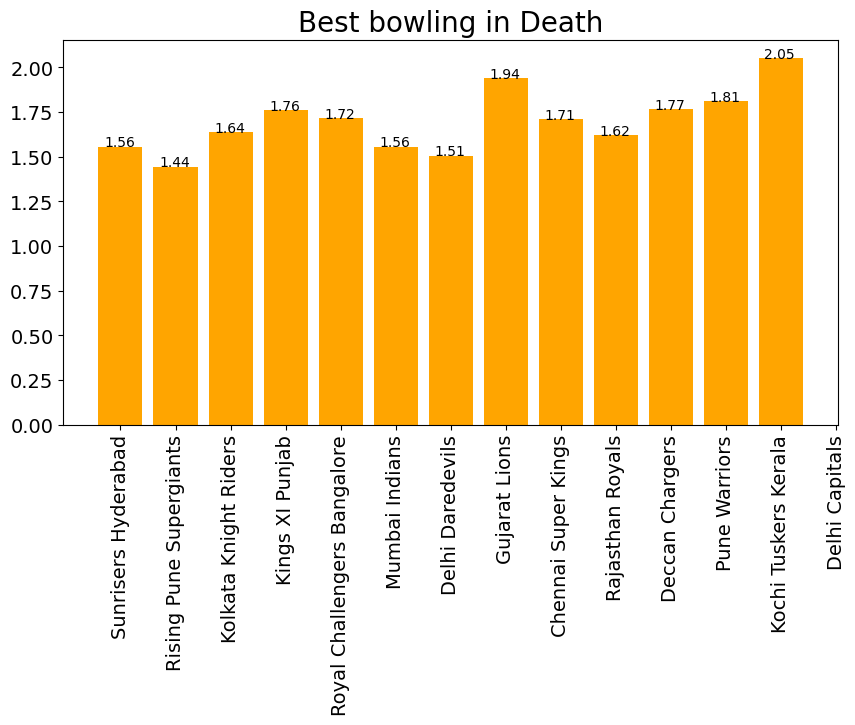

In [307]:
filterdeath = ballbyball_df['over']>=16
death_df = ballbyball_df[filterdeath]
death_df.reset_index(inplace = True)
wicketspermatch = []
for items in win_uniq:
    filterteam = powerplay_df['batting_team'] == items
    deathteam_df = death_df[filterteam]
    deathteam_df.reset_index(inplace = True)
    noofmatches = deathteam_df['match_id'].nunique()
    wicket_df = deathteam_df['dismissal_kind']
    a = wicket_df.isna().sum() 
    noofwickets = len(wicket_df) - a
    wicketspmatch = noofwickets/noofmatches
    wicketspermatch.append(wicketspmatch)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.3,y[i],round(y[i], 2))
#print(win_uniq)
#print(runperball)
df4 = pd.DataFrame(data=zip(win_uniq, wicketspermatch),columns=['Team name','powerplay wickets per match'])
print(df4)
fig,ax=plt.subplots(figsize=(10,5))
plt.bar(win_uniq, wicketspermatch,color="orange")
addlabels(win_uniq, wicketspermatch)
plt.title('Best bowling in Death',fontsize=20)
ab = plt.gca()
for tick in ab.get_xticklabels(): 
    tick.set_rotation(90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Number of Half-centuries by different players

In [269]:
half_cen = df_deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()
half_centuries = half_cen.sort_values(by='count').tail(15).reset_index(drop=True)
half_centuries
half_cen.head(10)

,batsman,count
0,DA Warner,44
1,V Kohli,38
2,SK Raina,38
3,S Dhawan,37
4,RG Sharma,36
5,G Gambhir,36
6,AB de Villiers,34
7,CH Gayle,28
8,AM Rahane,27
9,RV Uthappa,24


# Number of centuries scored by different players

In [270]:
full_cen = df_deliveries.groupby(['batsman', 'match_id']).agg({'batsman_runs':'sum'})
full_cen = full_cen[full_cen['batsman_runs']>100]
full_cen = full_cen.groupby(['batsman']).agg({'count'})
full_cen.columns = full_cen.columns.droplevel()
full_cen = full_cen.sort_values(by='count', ascending=False).reset_index()
full_centuries = full_cen.sort_values(by='count', ascending=False).head(15).reset_index(drop=True)
full_centuries

,batsman,count
0,CH Gayle,7
1,SR Watson,4
2,DA Warner,4
3,V Kohli,3
4,AB de Villiers,3
5,V Sehwag,2
6,KL Rahul,2
7,SV Samson,2
8,HM Amla,2
9,AM Rahane,2


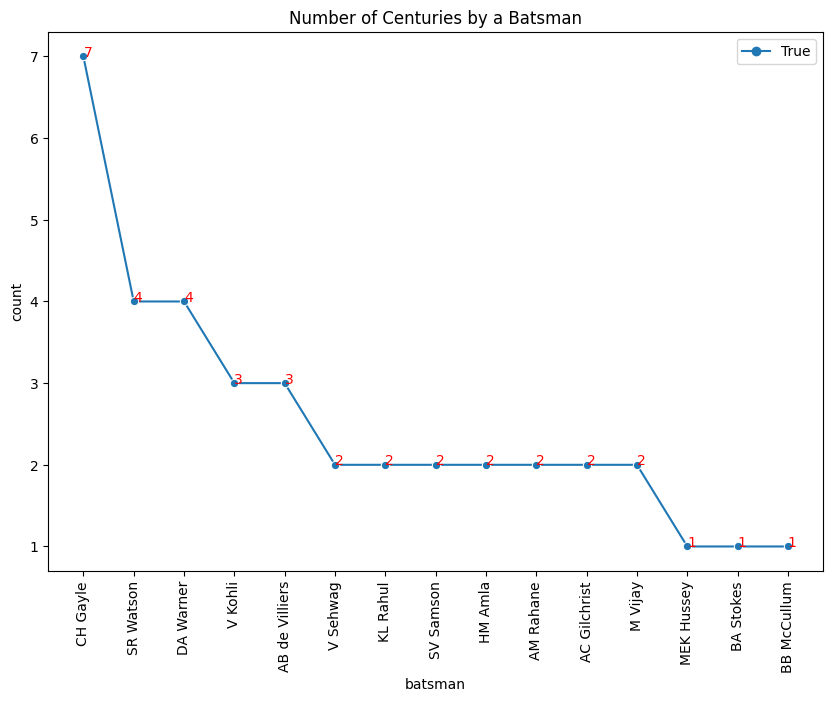

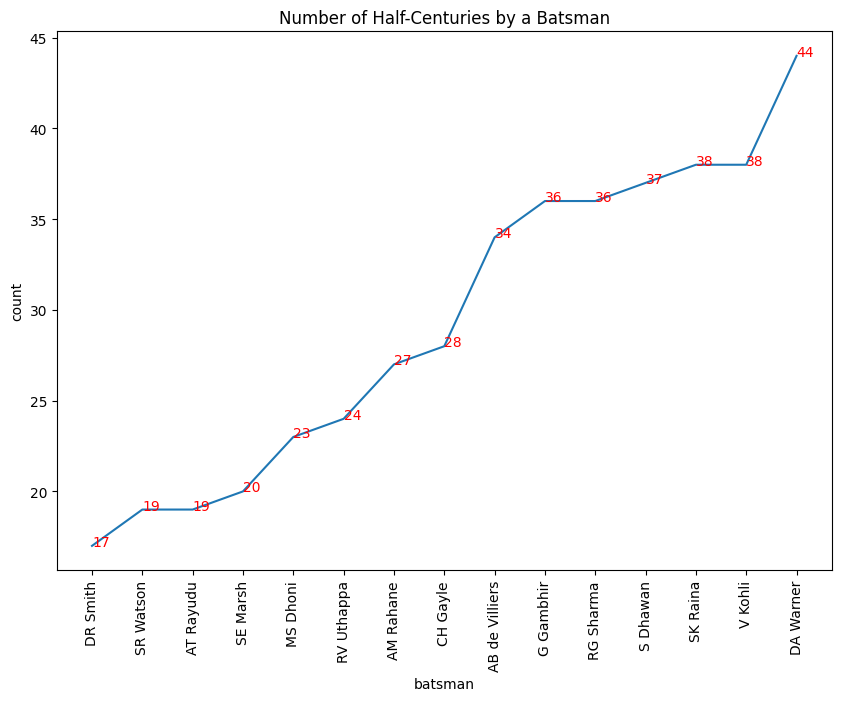

In [271]:
#creating a plot
fig, ax = plt.subplots(figsize=(10, 7))
count=[True for i in range(full_centuries.shape[0])]
sns.lineplot(data=full_centuries, x="batsman", y="count", hue=count, style=count, markers=True)
plt.title("Number of Centuries by a Batsman")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
for x,y in full_centuries[['batsman','count']].values:
  ax.text(x,y,y,color='r')
fig2, ax2 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=half_centuries, x="batsman", y="count", markers=True)
plt.title("Number of Half-Centuries by a Batsman")
plt.xticks(rotation=90)
for x,y in half_centuries[['batsman','count']].values:
  ax2.text(x,y,y,color='r')
plt.show()

# Average runs by different batsmen

In [272]:
avg_runs = df_deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
count = avg_runs.groupby(['batsman']).agg({'count'})
runs = avg_runs.groupby(['batsman']).agg({'sum'})
print(runs.iloc[:, 0].sort_values( ascending=False))

count.columns = count.columns.droplevel()
avg = pd.DataFrame()
avg = runs.iloc[:, 0].div(count.iloc[:, 0])
avg = avg.sort_values(ascending=False)
display(avg.iloc[:20])

batsman
V Kohli        5434
SK Raina       5415
RG Sharma      4914
DA Warner      4741
S Dhawan       4632
               ... 
IC Pandey         0
J Denly           0
P Raj             0
Sunny Gupta       0
L Ablish          0
Name: (batsman_runs, sum), Length: 516, dtype: int64


batsman
J Bairstow        46.800000
DA Warner         37.626984
LMP Simmons       37.206897
CH Gayle          36.774194
SE Marsh          36.072464
HM Amla           36.062500
KL Rahul          34.706897
ML Hayden         34.593750
MEK Hussey        34.086207
R Parag           33.800000
MN van Wyk        33.400000
RR Pant           33.185185
KS Williamson     32.170732
V Kohli           32.153846
CA Lynn           31.902439
JC Buttler        31.800000
AB de Villiers    31.183099
SR Tendulkar      29.923077
Q de Kock         29.780000
N Pooran          29.500000
dtype: float64

# Strike rate of different batsman

In [273]:
balls = df_deliveries['batsman'].value_counts()
balls = balls.sort_index()
run1 = runs['batsman_runs']>500
j=0
strike_rate = {}
# runs['batsman_runs'].iloc[0, :]
for i in run1['sum']:
    if(i):
        strike_rate[balls.index[j]] = 100*int(runs['batsman_runs'].iloc[j, :])/balls[j]
    j+=1

sorted_strike_rate = sorted(strike_rate.items(), key=lambda x:x[1])
new = pd.DataFrame.from_dict(sorted_strike_rate)
new.columns = ['Batsman', 'Strike Rate']
display(new.iloc[::-1].head(25))
top_strike_rate = []
top_strike_rate = new.iloc[::-1].head(20).iloc[:, 0]

,Batsman,Strike Rate
107,AD Russell,179.950187
106,SP Narine,166.943867
105,RR Pant,162.318841
104,GJ Maxwell,155.543237
103,CH Morris,153.392330
102,HH Pandya,151.902174
101,JC Buttler,150.000000
100,V Sehwag,148.827059
99,AB de Villiers,148.740343
98,CH Gayle,145.640370


# Most Extras by bowlers

In [314]:
#Most extras by a bowler
extra_runs = df_deliveries.groupby(['bowler','match_id']).agg({'extra_runs':'sum'})
extra_runs = extra_runs.groupby(['bowler']).agg({'sum'})
sorted_extra_runs = []
sorted_extra_runs = extra_runs['extra_runs']
sorted_extra_runs = sorted_extra_runs.sort_values(by='sum', ascending=False)
# display(sorted_extra_runs.head(10))
extra_runs = pd.DataFrame()
extra_runs['Bowler Name'] = sorted_extra_runs.index
extra_runs['Extras'] = sorted_extra_runs.values
extra_runs.head(10)

,Bowler Name,Extras
0,SL Malinga,293
1,P Kumar,236
2,UT Yadav,219
3,DJ Bravo,201
4,B Kumar,197
5,I Sharma,194
6,RP Singh,181
7,DW Steyn,171
8,SR Watson,171
9,Harbhajan Singh,170


# Average Runs scored by teams in first innings

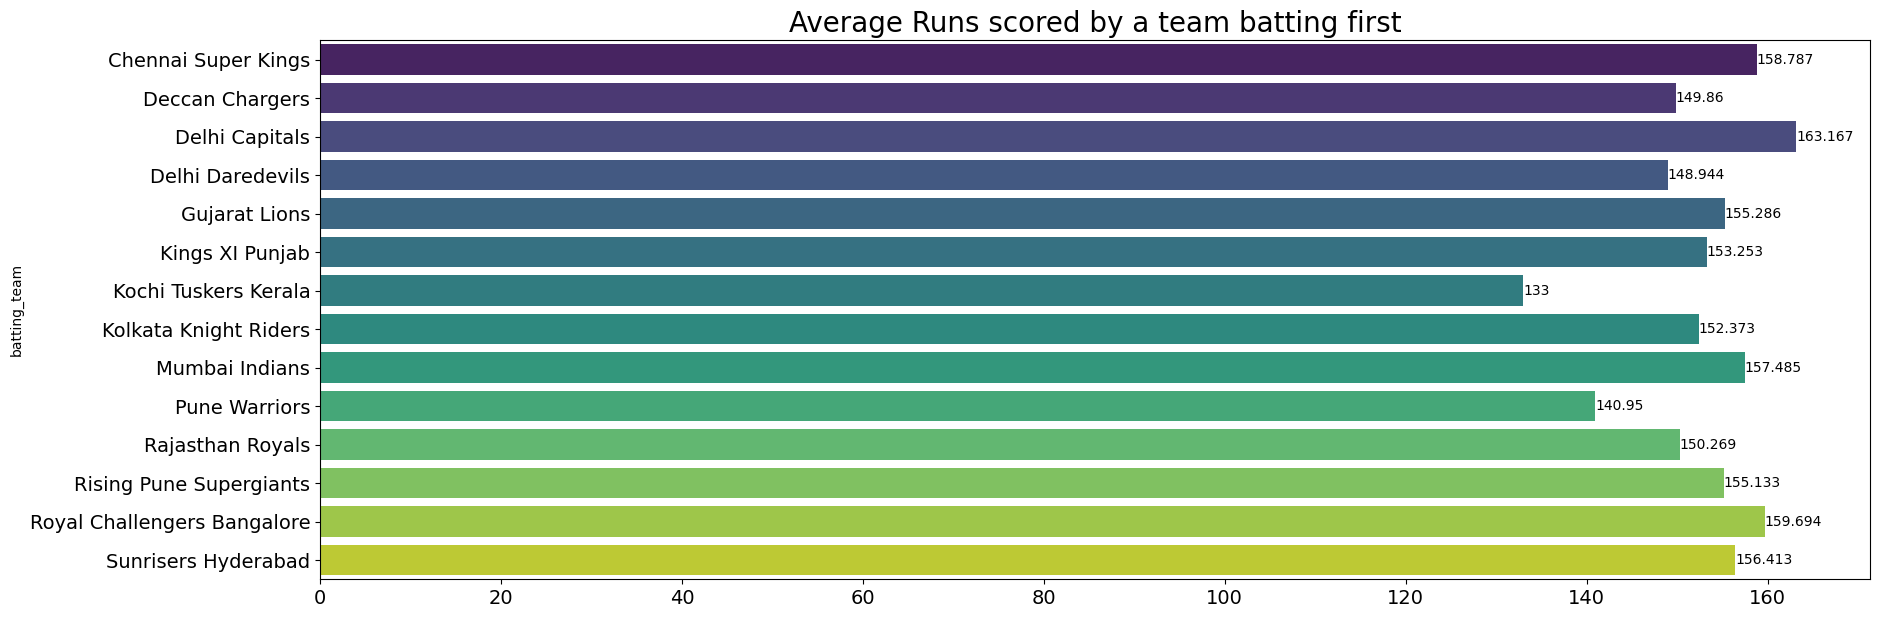

In [275]:
avg_team_runs = df_deliveries.apply(lambda row: row[df_deliveries['inning'] == 1])
avg_team_runs = avg_team_runs.groupby(['batting_team', 'match_id']).agg({'batsman_runs':'sum'})

match_count = avg_team_runs.groupby(['batting_team']).agg({'count'})
total_runs = avg_team_runs.groupby(['batting_team']).agg({'sum'})

avg_runs_batting_first = total_runs.iloc[:, 0]/match_count.iloc[:, 0]
# avg_runs_batting_first = avg_runs_batting_first.sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(20,7))
ax = sns.barplot(y=total_runs.index, x=avg_runs_batting_first.values,palette='viridis')
plt.title("Average Runs scored by a team batting first",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel=""
for i in ax.containers:
    ax.bar_label(i,)


# Top run getters for a team

In [276]:
best_batsman = df_deliveries.groupby(['batting_team', 'match_id', 'batsman']).agg({'batsman_runs':'sum'}) 
best_batsman = best_batsman.groupby(['batting_team', 'batsman']).agg({'sum'})
a = best_batsman.iloc[:, 0].sort_values(ascending=False)
a = a.index

list = []
for i in df_deliveries['batting_team'].unique():
    for b in range(len(a)):
        if(i == a[b][0]):
            list.append(a[b])
            break
top_run_getters = pd.DataFrame(list)
top_run_getters.columns = ['Team Name', 'Batsman']
display(top_run_getters)


,Team Name,Batsman
0,Sunrisers Hyderabad,DA Warner
1,Royal Challengers Bangalore,V Kohli
2,Mumbai Indians,RG Sharma
3,Rising Pune Supergiants,AM Rahane
4,Gujarat Lions,SK Raina
5,Kolkata Knight Riders,G Gambhir
6,Kings XI Punjab,SE Marsh
7,Delhi Daredevils,V Sehwag
8,Chennai Super Kings,SK Raina
9,Rajasthan Royals,AM Rahane


# Top run getters against different teams

In [277]:
best_batsman = df_deliveries.groupby(['bowling_team', 'match_id', 'batsman']).agg({'batsman_runs':'sum'}) 
best_batsman = best_batsman.groupby(['bowling_team', 'batsman']).agg({'sum'})
display(best_batsman.iloc[:, 0].sort_values(ascending=False).head(25))
a = best_batsman.iloc[:, 0].sort_values(ascending=False).index
list = []
for i in df_deliveries['bowling_team'].unique():
    for b in range(len(a)):
        if(i == a[b][0]):
            list.append(a[b])
            break
top_run_getters = pd.DataFrame(list)
top_run_getters.columns = ['Team Name', 'Batsman']
display(top_run_getters)

bowling_team                 batsman       
Kolkata Knight Riders        DA Warner         835
Kings XI Punjab              DA Warner         833
                             SK Raina          828
Kolkata Knight Riders        RG Sharma         827
Mumbai Indians               SK Raina          824
Kolkata Knight Riders        SK Raina          820
Royal Challengers Bangalore  MS Dhoni          808
Kings XI Punjab              CH Gayle          797
Delhi Daredevils             V Kohli           763
Chennai Super Kings          V Kohli           749
Kings XI Punjab              G Gambhir         735
                             RV Uthappa        722
Chennai Super Kings          RG Sharma         710
Delhi Daredevils             RG Sharma         703
Royal Challengers Bangalore  RG Sharma         693
Kings XI Punjab              AB de Villiers    685
Delhi Daredevils             AM Rahane         677
Kolkata Knight Riders        V Kohli           675
Mumbai Indians               S Dhawan 

,Team Name,Batsman
0,Royal Challengers Bangalore,MS Dhoni
1,Sunrisers Hyderabad,SR Watson
2,Rising Pune Supergiants,V Kohli
3,Mumbai Indians,SK Raina
4,Kolkata Knight Riders,DA Warner
5,Gujarat Lions,DA Warner
6,Kings XI Punjab,DA Warner
7,Delhi Daredevils,V Kohli
8,Chennai Super Kings,V Kohli
9,Rajasthan Royals,SK Raina


# Best Partnerships

In [278]:
contribution_list = df_deliveries.groupby(['batsman', 'non_striker', 'match_id']).agg({'total_runs':'sum'}) 
contribution_list = contribution_list.iloc[:, 0].sort_values(ascending=False)
partnership = []
for i in contribution_list.index:
    for j in contribution_list.index:
        if i[0] == j[1] and j[0] == i[1] and i[2] == j[2]:
            partnership.append([i[0], i[1], contribution_list[i] + contribution_list[j]])
    if(len(partnership) == 10):
        break
# print(partnership)
from operator import itemgetter
partnership = sorted(partnership, key=itemgetter(2))[::-1]
partnership = pd.DataFrame(partnership)
partnership.columns = ['Batsman 1', 'Batsman 2', 'Partnership Runs']
display(partnership)

,Batsman 1,Batsman 2,Partnership Runs
0,AB de Villiers,V Kohli,229
1,AB de Villiers,V Kohli,215
2,AC Gilchrist,SE Marsh,206
3,CH Gayle,V Kohli,204
4,DA Warner,NV Ojha,189
5,J Bairstow,DA Warner,186
6,RG Sharma,HH Gibbs,167
7,CH Gayle,TM Dilshan,167
8,AC Gilchrist,VVS Laxman,155
9,DA Warner,S Dhawan,139


# Overwise strike rate of different batsman

In [279]:
best_partnership_1 = df_deliveries.groupby(['batsman', 'match_id', 'over','ball']).agg({'batsman_runs':'sum'}) 
over_wise_runs = best_partnership_1.groupby(['batsman', 'over']).agg({'sum'})
over_count = best_partnership_1.groupby(['batsman', 'over']).agg({'count'})
over_strike_rate =100*over_wise_runs.iloc[:, 0]/over_count.iloc[:, 0]
# display(over_strike_rate.index)
list5 = []
for i in over_strike_rate.index:
    for j in top_strike_rate:
        if i[0] == j:
            list5.append([i[0], i[1], over_strike_rate[i]])
over_wise_strike_rate = pd.DataFrame(list5)
over_wise_strike_rate.columns = ['Batsman', 'Over', 'Strike Rate']
display(over_wise_strike_rate)

,Batsman,Over,Strike Rate
0,AB de Villiers,1,166.666667
1,AB de Villiers,2,100.000000
2,AB de Villiers,3,83.333333
3,AB de Villiers,4,114.529915
4,AB de Villiers,5,127.380952
...,...,...,...
384,YK Pathan,16,137.948718
385,YK Pathan,17,170.000000
386,YK Pathan,18,159.006211
387,YK Pathan,19,169.696970


# Highest wins by a team in each season

In [280]:
matches=match.copy()
matches.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
wins = matches.groupby('season')['winner'].value_counts()
# Making DataFrame
year = 2008
win_per_season= pd.DataFrame(columns=['Season', 'Team', 'Number of Wins'])
for items in wins.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'Season': [items[0][0]],
            'Team': [items[0][1]],
            'Number of Wins': [items[1]]
        })
        win_per_season = win_per_season.append(win_series)
        year += 1   
win_per_season

/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/249076289.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  win_per_season = win_per_season.append(win_series)
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/249076289.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  win_per_season = win_per_season.append(win_series)
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/249076289.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  win_per_season = win_per_season.append(win_series)
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_5883/249076289.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

,Season,Team,Number of Wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


# Strike Rate of different batsmen in each over

In [281]:
deliveries=delivery.copy()
deliveries.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
topbatsmen=deliveries['batsman'].value_counts()[:25].index
df_=deliveries.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='total_runs')
df_=df_.fillna(0).reset_index()
df_.columns=['batsman','over','balls','runs']
df_['strike_rate']=round(df_.runs/df_.balls*100,1)
df_[df_.batsman.isin(topbatsmen)].pivot_table(columns='over',index='batsman',values='strike_rate',aggfunc='mean').fillna(0).style.format("{:.1f}")

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batsman,,,,,,,,,,,,,,,,,,,,
AB de Villiers,166.7,122.5,86.1,118.8,131.5,134.8,113.6,115.6,122.7,134.1,134.5,139.2,152.0,154.8,170.5,196.1,189.2,251.5,271.8,253.6
AM Rahane,89.7,115.9,119.1,137.1,147.2,130.6,102.5,108.5,104.7,136.1,115.8,129.9,129.2,155.5,154.5,144.0,165.9,177.9,111.6,181.2
AT Rayudu,117.9,85.9,103.2,106.0,109.7,127.0,98.7,95.6,121.6,106.0,124.2,135.8,129.3,137.6,142.5,158.1,156.2,176.8,199.1,160.0
BB McCullum,115.0,109.9,143.4,145.2,141.2,162.1,136.3,133.8,123.9,132.8,123.5,151.2,151.4,160.3,148.4,109.1,221.4,123.5,223.5,287.5
CH Gayle,100.5,117.5,162.5,166.1,168.5,152.9,128.6,168.7,181.6,135.6,166.4,169.5,192.2,195.6,214.5,216.5,163.3,272.0,237.9,195.7
DA Warner,102.9,139.9,153.9,147.8,182.4,162.6,119.2,130.8,147.2,136.5,141.9,144.0,139.2,148.1,174.1,188.5,172.6,184.1,255.3,187.0
G Gambhir,98.5,123.7,126.3,133.3,151.0,131.0,115.6,107.7,111.9,138.5,126.8,115.9,149.6,148.3,145.7,156.1,134.3,153.5,131.2,0.0
JH Kallis,89.6,107.8,115.7,116.5,111.0,119.2,87.7,83.8,94.7,115.0,93.9,116.5,115.5,111.2,108.5,126.4,183.6,231.5,150.0,200.0
KA Pollard,300.0,0.0,100.0,44.4,171.4,95.7,78.0,97.7,84.3,107.2,127.5,106.5,127.0,152.9,158.8,140.1,176.3,158.3,186.1,212.9


# Comparing 2 given batsmen

In [315]:
balls=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,Deccan Chargers,10
1,A Ashish Reddy,196,280,142.857143,16,15,Sunrisers Hyderabad,36
2,A Chandila,7,4,57.142857,0,0,Rajasthan Royals,4
3,A Chopra,75,53,70.666667,7,0,Kolkata Knight Riders,24
4,A Choudhary,20,25,125.000000,1,1,Royal Challengers Bangalore,15


Enter the Measures to Compare the Batsmen from:
runs  strike_rate  6's  4's


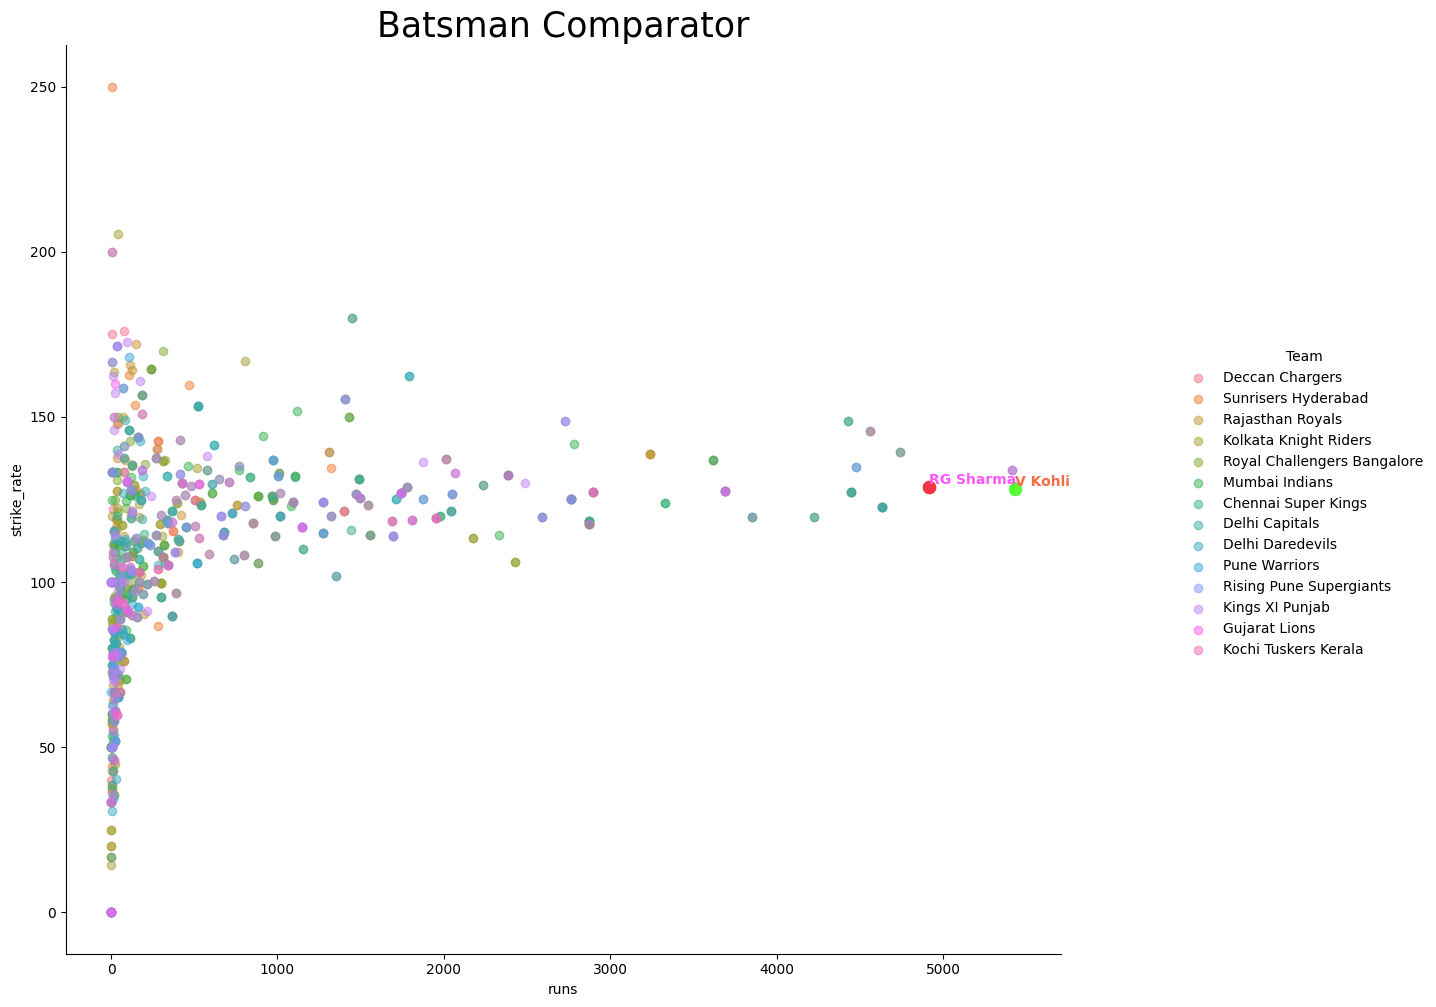

In [318]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',height=8).map(plt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    plt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    plt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,fontsize=10, weight='bold', color='#f46d43')
    plt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    plt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2,fontsize=10, weight='bold', color='#ff58fd')
    plt.gcf().set_size_inches(15,10)
    plt.title('Batsman Comparator',size=25)
    plt.show()
print("Enter the Measures to Compare the Batsmen from:\nruns  strike_rate  6's  4's")
stat1=input("Enter the First Measure:")
stat2=input("Enter the Second Measure:")
batsman1=input("Enter the Name of the First Batsman:")
batsman2=input("Enter the Name of the Second Batsman:")
batsman_comparator(stat1,stat2,batsman1,batsman2)

# Post Toss Win Choices of Teams

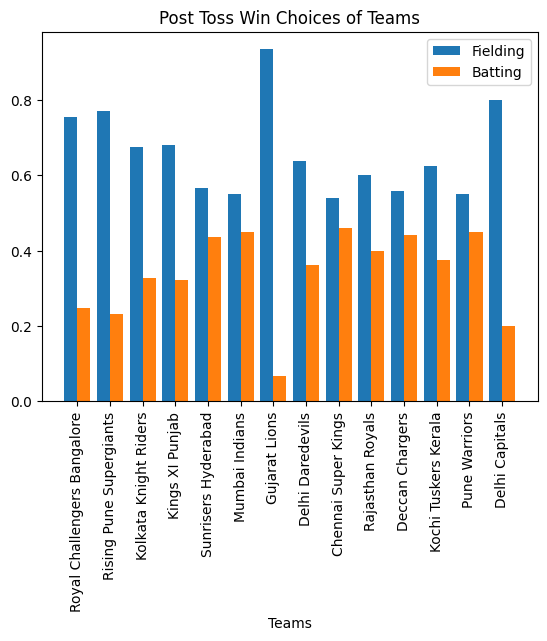

In [323]:
teams = df_matches['toss_winner'].unique()
field_probability = []
bat_probability = []
for team in teams:
    teamdf = df_matches[df_matches['toss_winner']==team]
    values = teamdf['toss_decision'].value_counts().values
    fieldprob = values[0]/(np.sum(values))
    batprob = 1 - fieldprob
    field_probability = np.append(field_probability, fieldprob)
    bat_probability = np.append(bat_probability, batprob)

X_axis = np.arange(len(teams))
plt.bar(X_axis - 0.2, field_probability, 0.4, label = 'Fielding')
plt.bar(X_axis + 0.2, bat_probability, 0.4, label = 'Batting')
plt.xticks(X_axis, teams, rotation = 90)
plt.xlabel("Teams")
plt.title("Post Toss Win Choices of Teams")
plt.legend()
plt.show()

In [ ]:
``